In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Import the libraries

In [66]:
df = pd.read_csv("dataset.csv")
df

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,SCND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,1,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18.405,15.852,2.3,4.698,10600000,9150000,194,3.6,Friday,Saturday
1,2,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,5.4,3.386,1.145,1.2,8.407,5760000,1950000,54,5.6,Tuesday,Sunday
2,3,caedrel,English,personality,League of Legends,I'm Only Sleeping,6.3,689.000,12.331,1.3,6.728,797000,14200000,111,2.8,Thursday,Sunday
3,4,caseoh_,English,personality,NBA 2K23,Just Chatting,4.6,7.185,0.000,3.6,2.554,4220000,53,385,6.2,Friday,Monday
4,5,ibai,Spanish,personality,Just Chatting,League of Legends,4.1,8.289,190.714,1.5,6.865,15600000,359000000,149,4.3,Wednesday,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,jlcs2,English,personality,Counter-Strike,Just Chatting,4.0,248.000,1.423,1.3,1.873,133000,766000,31,1.8,Monday,Saturday
995,997,nobru_xy,Portuguese,personality,Virtual Casino,NaN,10.4,874.000,0.000,1.0,21.000,1300,0,1,0.8,Friday,Friday
996,998,buxexa_t,Portuguese,personality,Virtual Casino,Slots,9.6,216.000,0.000,1.0,19.000,1300,0,2,0.4,Thursday,Thursday
997,999,sweetdreams,English,personality,Apex Legends,Z1: Battle Royale,5.1,605.000,16.190,1.1,6.827,837000,22400000,24,3.6,Tuesday,Monday


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RANK                            999 non-null    int64  
 1   NAME                            999 non-null    object 
 2   LANGUAGE                        999 non-null    object 
 3   TYPE                            999 non-null    object 
 4   MOST_STREAMED_GAME              999 non-null    object 
 5   SCND_MOST_STREAMED_GAME         922 non-null    object 
 6   AVERAGE_STREAM_DURATION         999 non-null    float64
 7   FOLLOWERS_GAINED_PER_STREAM     999 non-null    float64
 8   AVG_VIEWERS_PER_STREAM          999 non-null    float64
 9   AVG_GAMES_PER_STREAM            999 non-null    float64
 10  TOTAL_TIME_STREAMED             999 non-null    float64
 11  TOTAL_FOLLOWERS                 999 non-null    int64  
 12  TOTAL_VIEWS                     999 

In [68]:
df.dtypes

RANK                                int64
NAME                               object
LANGUAGE                           object
TYPE                               object
MOST_STREAMED_GAME                 object
SCND_MOST_STREAMED_GAME            object
AVERAGE_STREAM_DURATION           float64
FOLLOWERS_GAINED_PER_STREAM       float64
AVG_VIEWERS_PER_STREAM            float64
AVG_GAMES_PER_STREAM              float64
TOTAL_TIME_STREAMED               float64
TOTAL_FOLLOWERS                     int64
TOTAL_VIEWS                         int64
TOTAL_GAMES_STREAMED                int64
ACTIVE_DAYS_PER_WEEK              float64
MOST_ACTIVE_DAY                    object
DAY_WITH_MOST_FOLLOWERS_GAINED     object
dtype: object

In [69]:
df.shape

(999, 17)

In [70]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RANK,999.0,NaN,NaN,NaN,500.972973,288.576373,1.0,251.5,501.0,750.5,1000.0
NAME,999,999,kaicenat,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LANGUAGE,999,19,English,401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TYPE,999,2,personality,942,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MOST_STREAMED_GAME,999,105,Just Chatting,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCND_MOST_STREAMED_GAME,922,178,Just Chatting,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVERAGE_STREAM_DURATION,999.0,NaN,NaN,NaN,5.996697,3.241013,1.2,4.2,5.4,6.9,23.9
FOLLOWERS_GAINED_PER_STREAM,999.0,NaN,NaN,NaN,266.788599,274.912323,-424.0,5.5465,185.0,444.0,991.0
AVG_VIEWERS_PER_STREAM,999.0,NaN,NaN,NaN,70.257758,163.8733,0.0,3.381,12.454,37.596,991.0
AVG_GAMES_PER_STREAM,999.0,NaN,NaN,NaN,1.477878,0.575189,1.0,1.1,1.3,1.7,9.3


In [71]:
df.isnull().sum()

RANK                               0
NAME                               0
LANGUAGE                           0
TYPE                               0
MOST_STREAMED_GAME                 0
SCND_MOST_STREAMED_GAME           77
AVERAGE_STREAM_DURATION            0
FOLLOWERS_GAINED_PER_STREAM        0
AVG_VIEWERS_PER_STREAM             0
AVG_GAMES_PER_STREAM               0
TOTAL_TIME_STREAMED                0
TOTAL_FOLLOWERS                    0
TOTAL_VIEWS                        0
TOTAL_GAMES_STREAMED               0
ACTIVE_DAYS_PER_WEEK               0
MOST_ACTIVE_DAY                    0
DAY_WITH_MOST_FOLLOWERS_GAINED     0
dtype: int64

In [72]:
df.fillna(df.mean,inplace=True)
df.isnull().sum()

RANK                              0
NAME                              0
LANGUAGE                          0
TYPE                              0
MOST_STREAMED_GAME                0
SCND_MOST_STREAMED_GAME           0
AVERAGE_STREAM_DURATION           0
FOLLOWERS_GAINED_PER_STREAM       0
AVG_VIEWERS_PER_STREAM            0
AVG_GAMES_PER_STREAM              0
TOTAL_TIME_STREAMED               0
TOTAL_FOLLOWERS                   0
TOTAL_VIEWS                       0
TOTAL_GAMES_STREAMED              0
ACTIVE_DAYS_PER_WEEK              0
MOST_ACTIVE_DAY                   0
DAY_WITH_MOST_FOLLOWERS_GAINED    0
dtype: int64

In [73]:
df = pd.read_csv("dataset.csv")
k_df = df.select_dtypes(include=["object"])
k_df = k_df.fillna("None")
k_df

,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,SCND_MOST_STREAMED_GAME,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,Friday,Saturday
1,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,Tuesday,Sunday
2,caedrel,English,personality,League of Legends,I'm Only Sleeping,Thursday,Sunday
3,caseoh_,English,personality,NBA 2K23,Just Chatting,Friday,Monday
4,ibai,Spanish,personality,Just Chatting,League of Legends,Wednesday,Saturday
...,...,...,...,...,...,...,...
994,jlcs2,English,personality,Counter-Strike,Just Chatting,Monday,Saturday
995,nobru_xy,Portuguese,personality,Virtual Casino,None,Friday,Friday
996,buxexa_t,Portuguese,personality,Virtual Casino,Slots,Thursday,Thursday
997,sweetdreams,English,personality,Apex Legends,Z1: Battle Royale,Tuesday,Monday


In [74]:
k_df.LANGUAGE.unique()

array(['English', 'Spanish', 'French', 'German', 'Russian', 'Japanese',
       'Chinese', 'Portuguese', 'Italian', 'Polish', 'Turkish',
       'Ukrainian', 'Korean', 'Thai', 'Hungarian', 'Czech', 'Cantonese',
       'Romanian', 'Arabic'], dtype=object)

In [75]:
k_df.MOST_STREAMED_GAME.unique()

array(['Just Chatting', "Tom Clancy's Rainbow Six Siege",
       'League of Legends', 'NBA 2K23', 'Minecraft', 'World of Warcraft',
       'VALORANT', 'Dota 2', 'Grand Theft Auto V', 'Apex Legends',
       'PUBG: BATTLEGROUNDS', 'Overwatch', 'Counter-Strike',
       'Street Fighter 6', 'Sports', 'Brawl Stars', 'Trackmania',
       'Warframe', 'Rocket League', 'Teamfight Tactics',
       'Software and Game Development', 'Valorant', 'Escape from Tarkov',
       'FIFA 21', 'Hearthstone', 'Fortnite', 'EA Sports FC 24',
       'Path of Exile', 'Madden NFL 24', 'Dark Souls', 'FIFA 23',
       'Ashes of Creation', 'Super Auto Pets', 'Variety',
       'Magic: The Gathering', 'GeoGuessr', 'Chess', 'Destiny 2',
       'World of Tanks', 'Special Events', 'Music', 'NBA 2K22',
       'Genshin Impact', 'Call of Duty: Warzone', 'FIFA 19', 'Brawlhalla',
       'Games + Demos', 'Dead by Daylight', 'FINAL FANTASY XIV ONLINE',
       'Talk Shows & Podcasts', 'ELDEN RING', 'Super Mario World',
       'The

In [76]:
k_df.SCND_MOST_STREAMED_GAME.unique()

array(["I'm Only Sleeping", 'NBA 2K20', 'Just Chatting',
       'League of Legends', 'VALORANT', 'Counter-Strike',
       'League of Legends: Wild Rift', 'Minecraft', 'None',
       'Apex Legends', 'Grand Theft Auto V', 'Fortnite', 'Variety',
       'Among Us', 'Virtual Casino', 'Call of Duty: Warzone',
       'Overwatch 2', 'Slots', "Garry's Mod", 'Escape from Tarkov',
       'PUBG: BATTLEGROUNDS', 'TrackMania 2: Stadium', 'Special Events',
       'Sports', 'Science & Technology', 'World of Warcraft', 'FIFA 23',
       'IRL', 'FIFA 22', 'Dota 2', 'Teamfight Tactics', 'Tabletop RPGs',
       'Monster Hunter: World', 'Clash Royale', 'Music', 'ELDEN RING',
       'Poker', 'EA Sports FC 24', 'Rust', 'Gartic Phone',
       'Talk Shows & Podcasts', 'The Elder Scrolls Online',
       'The Last of Us Part II', 'The Binding of Isaac: Repentance',
       'TrackMania (1)', 'Winning Eleven: Pro Evolution Soccer 2007',
       'Overwatch', 'Call of Duty: Modern Warfare III',
       'Magic: The Gath

In [77]:
k_df.TYPE.unique()

array(['personality', 'esports'], dtype=object)

In [78]:
k_df.LANGUAGE.unique()

array(['English', 'Spanish', 'French', 'German', 'Russian', 'Japanese',
       'Chinese', 'Portuguese', 'Italian', 'Polish', 'Turkish',
       'Ukrainian', 'Korean', 'Thai', 'Hungarian', 'Czech', 'Cantonese',
       'Romanian', 'Arabic'], dtype=object)

In [79]:
k_df["LANGUAGE"].value_counts().count()

19

In [80]:
k_df["LANGUAGE"].value_counts()

LANGUAGE
English       401
Russian       115
Spanish       106
Portuguese     82
Japanese       79
French         72
German         60
Chinese        28
Polish         18
Italian        13
Turkish         7
Thai            5
Ukrainian       3
Czech           3
Korean          2
Cantonese       2
Hungarian       1
Romanian        1
Arabic          1
Name: count, dtype: int64

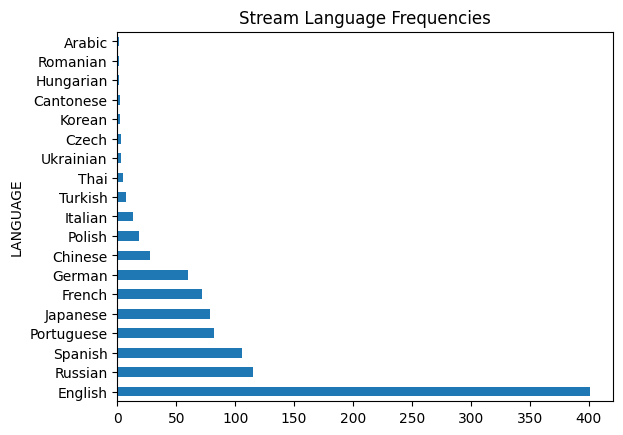

In [81]:
k_df["LANGUAGE"].value_counts().plot.barh().set_title("Stream Language Frequencies");

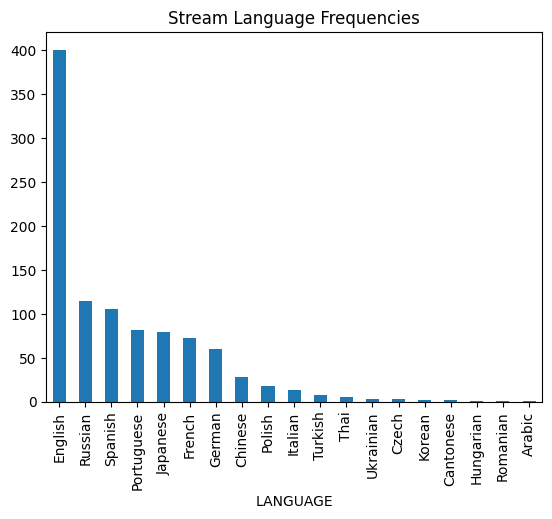

In [82]:
k_df["LANGUAGE"].value_counts().plot.bar().set_title("Stream Language Frequencies");

In [83]:
k_df["MOST_STREAMED_GAME"].value_counts().count()

105

In [84]:
k_df["MOST_STREAMED_GAME"].value_counts()

MOST_STREAMED_GAME
Just Chatting         257
League of Legends      84
Grand Theft Auto V     74
VALORANT               60
Casino                 36
                     ... 
Ashes of Creation       1
Dungeons & Dragons      1
Dark Souls              1
MORDHAU                 1
Halo Infinite           1
Name: count, Length: 105, dtype: int64

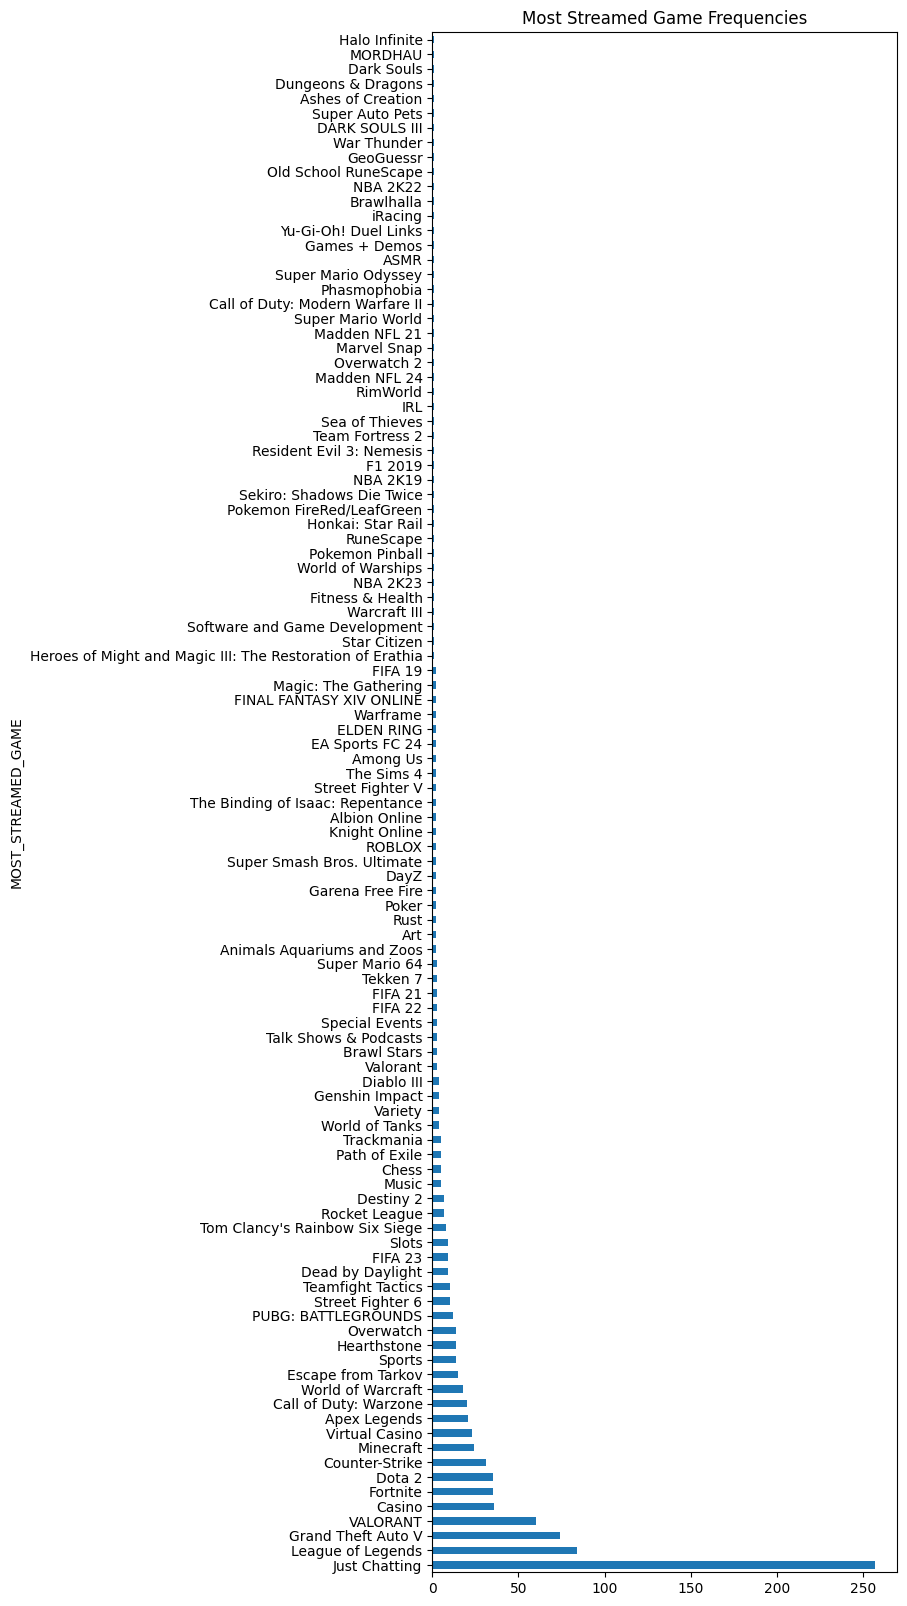

In [85]:
plt.figure(figsize=(6,20))
k_df["MOST_STREAMED_GAME"].value_counts().plot.barh().set_title("Most Streamed Game Frequencies");

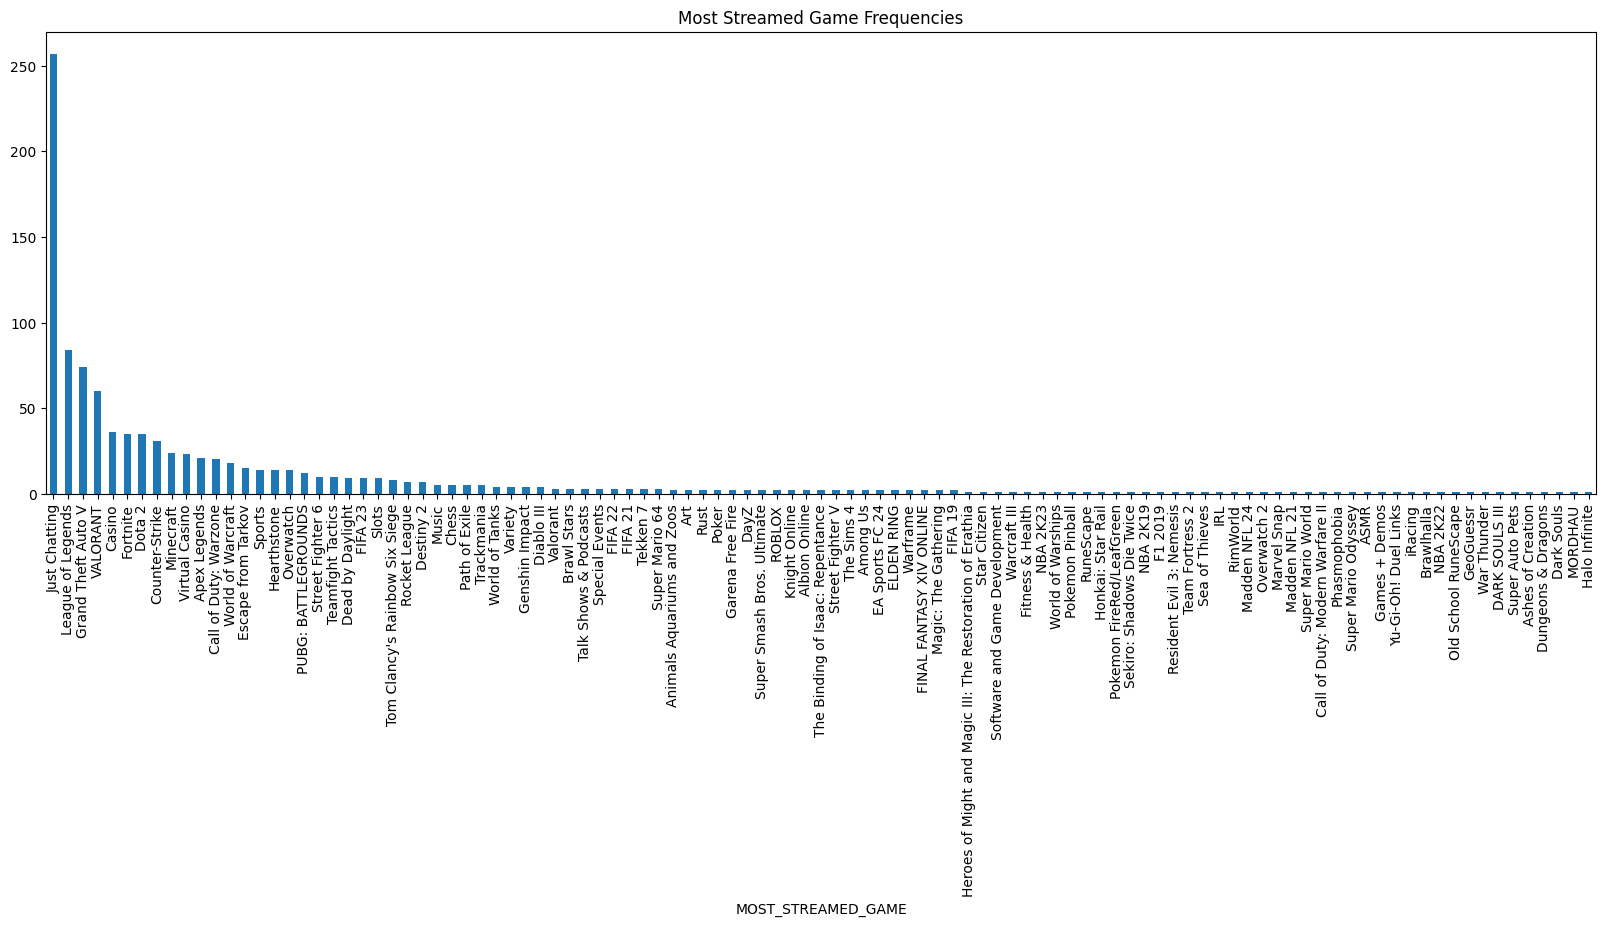

In [86]:
plt.figure(figsize=(20,6))
k_df["MOST_STREAMED_GAME"].value_counts().plot.bar().set_title("Most Streamed Game Frequencies");

In [87]:
k_df["SCND_MOST_STREAMED_GAME"].value_counts().count()

179

In [88]:
k_df["SCND_MOST_STREAMED_GAME"].value_counts()

SCND_MOST_STREAMED_GAME
Just Chatting                                         155
None                                                   77
VALORANT                                               51
Minecraft                                              42
Grand Theft Auto V                                     40
                                                     ... 
Heroes of Might and Magic III: The Shadow of Death      1
Lethal Company                                          1
Jackbox Party Packs                                     1
Animal Crossing: New Horizons                           1
Raft                                                    1
Name: count, Length: 179, dtype: int64

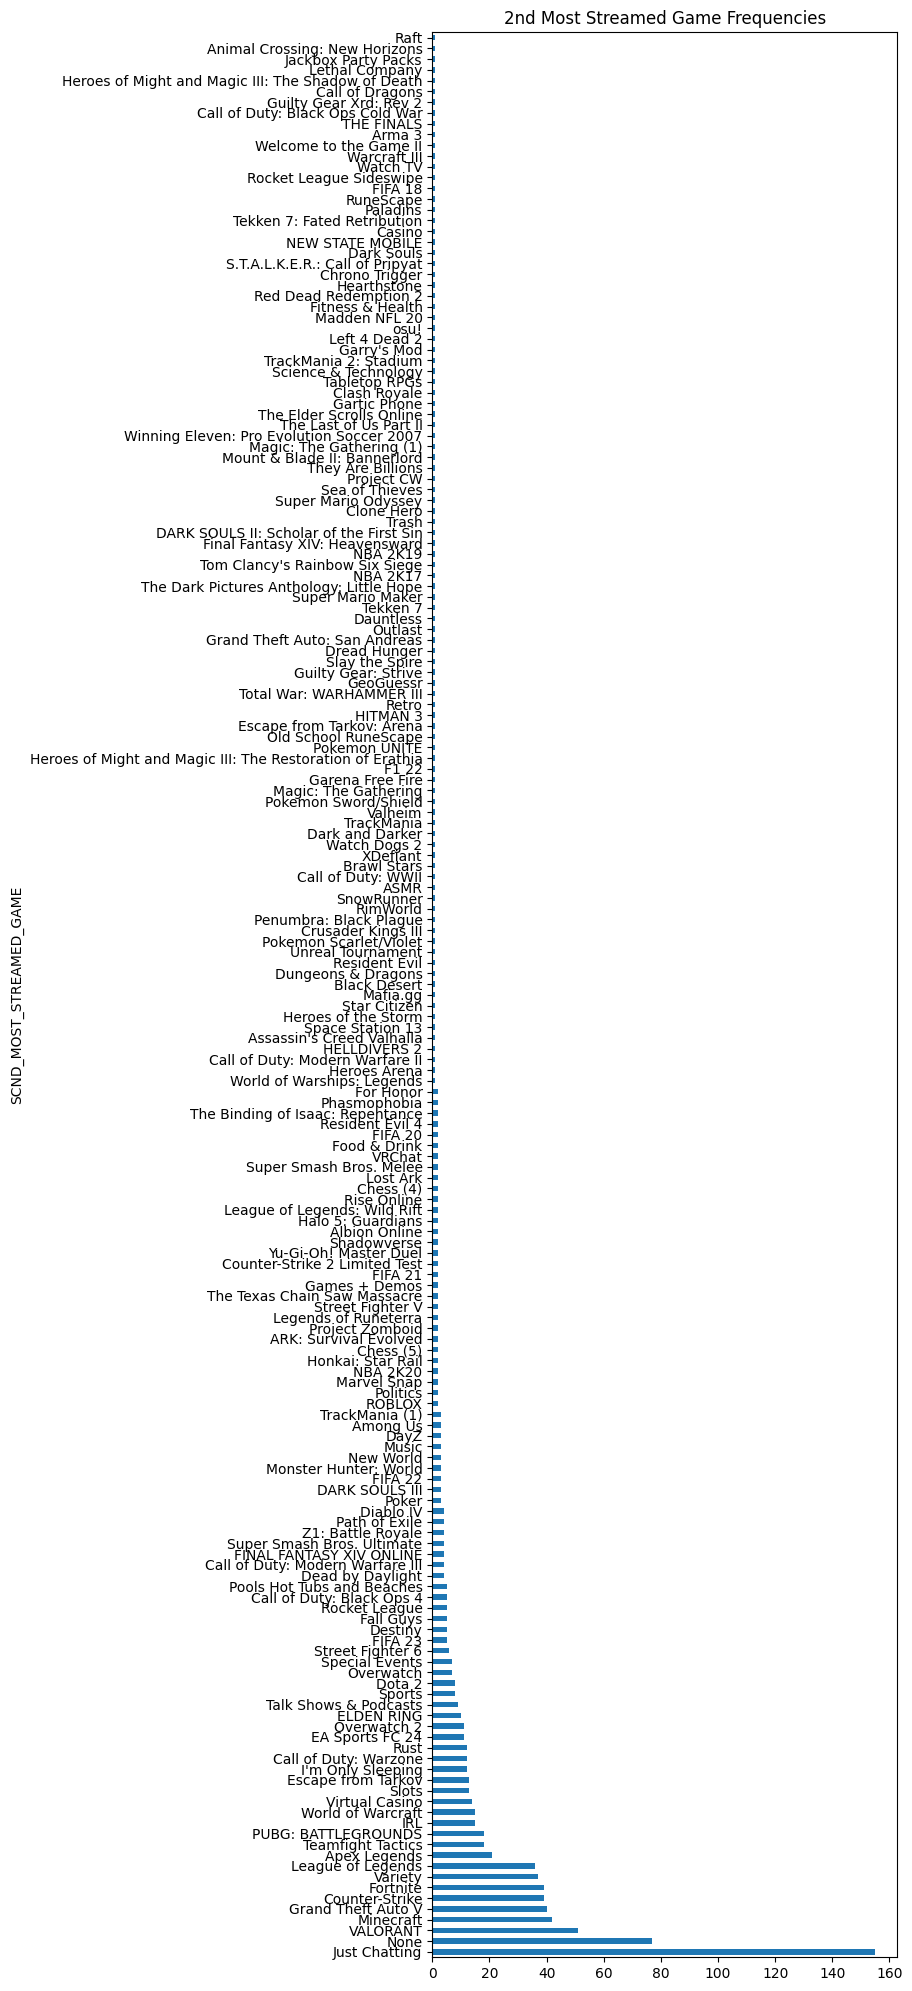

In [89]:
plt.figure(figsize=(6,25))
k_df["SCND_MOST_STREAMED_GAME"].value_counts().plot.barh().set_title("2nd Most Streamed Game Frequencies");

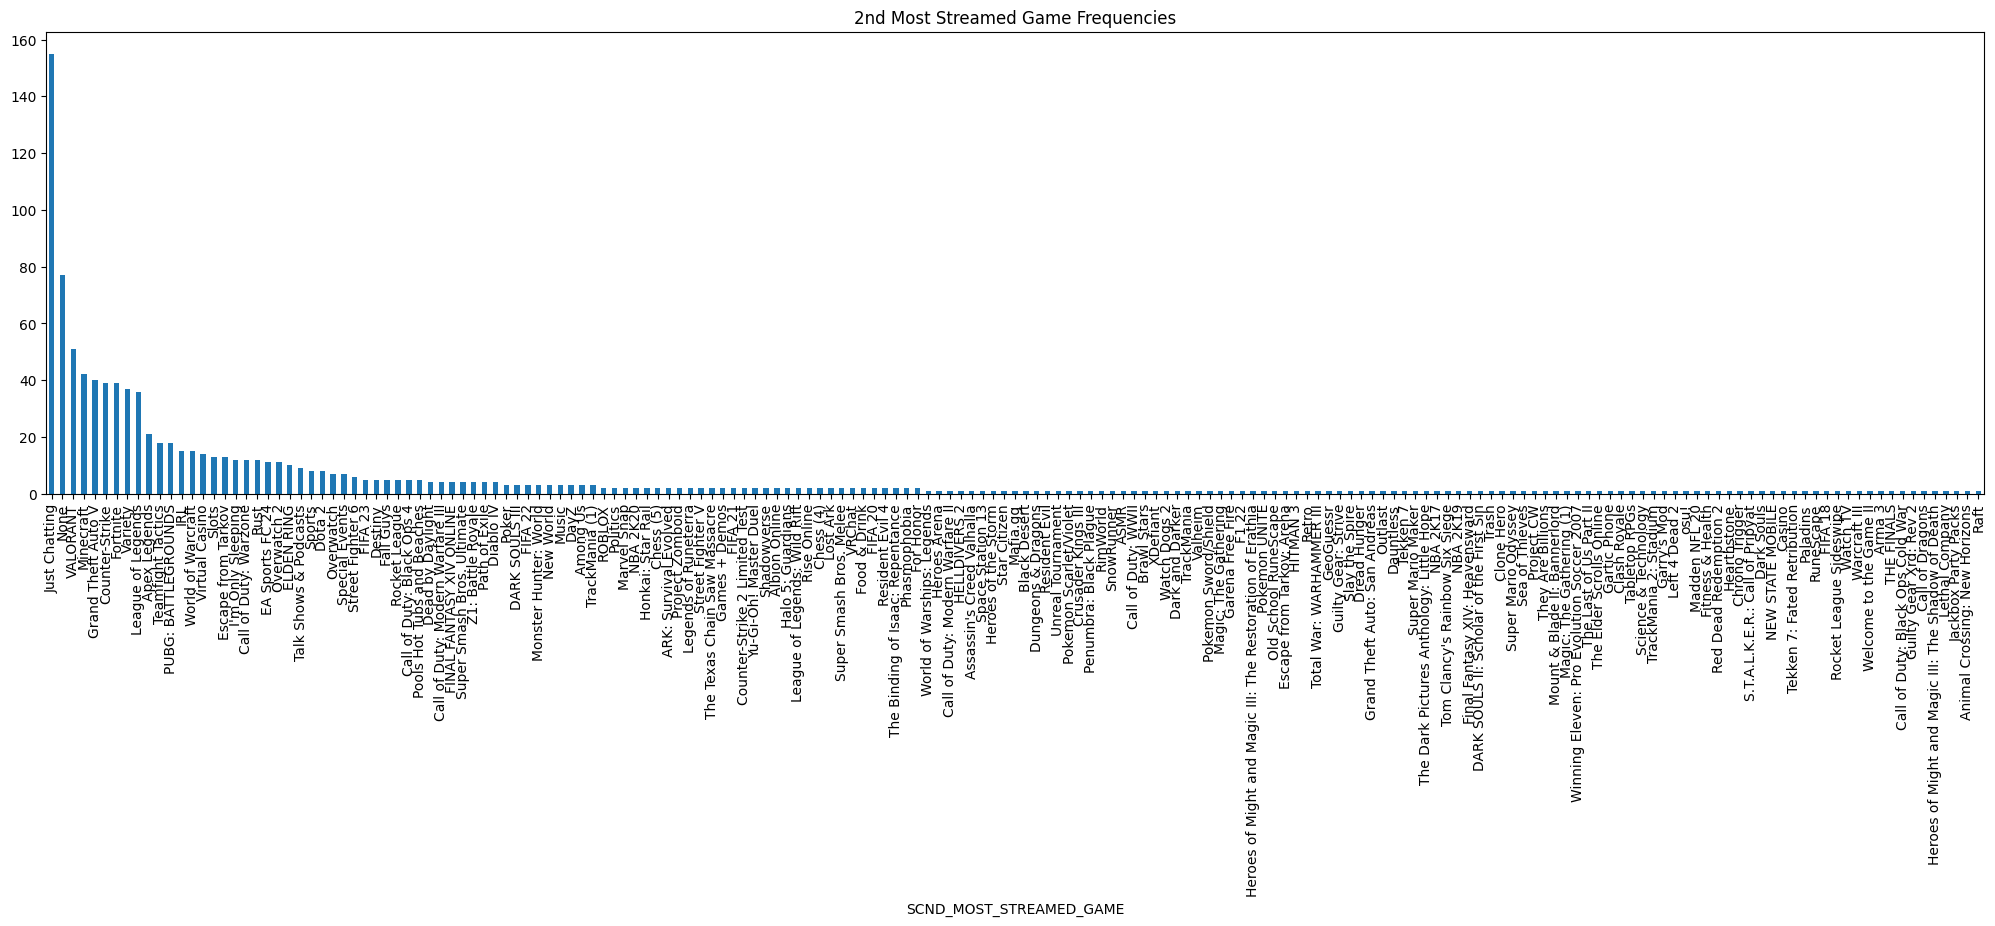

In [90]:
plt.figure(figsize=(25,6))

k_df["SCND_MOST_STREAMED_GAME"].value_counts().plot.bar().set_title("2nd Most Streamed Game Frequencies");

In [91]:
k_df["TYPE"].value_counts().count()

2

In [92]:
k_df["TYPE"].value_counts()

TYPE
personality    942
esports         57
Name: count, dtype: int64

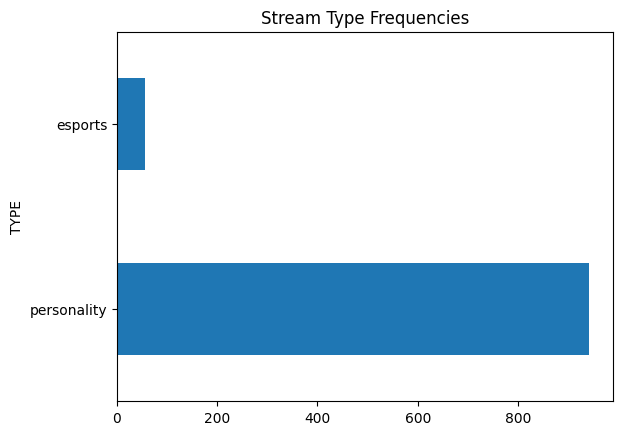

In [93]:
k_df["TYPE"].value_counts().plot.barh().set_title("Stream Type Frequencies");

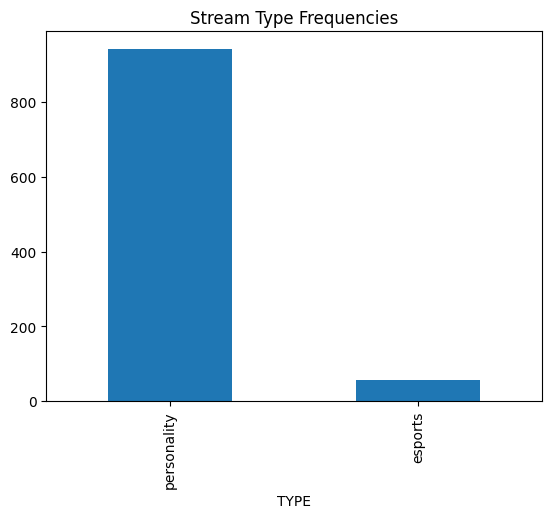

In [94]:
k_df["TYPE"].value_counts().plot.bar().set_title("Stream Type Frequencies");

In [95]:
df = pd.read_csv("dataset.csv")

In [96]:
df_num = df.select_dtypes(include=["int64","float64"])

In [97]:
df_num.head(10)

,RANK,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK
0,1,7.6,18.405,15.852,2.3,4.698,10600000,9150000,194,3.6
1,2,5.4,3.386,1.145,1.2,8.407,5760000,1950000,54,5.6
2,3,6.3,689.000,12.331,1.3,6.728,797000,14200000,111,2.8
3,4,4.6,7.185,0.000,3.6,2.554,4220000,53,385,6.2
4,5,4.1,8.289,190.714,1.5,6.865,15600000,359000000,149,4.3
5,6,3.7,13.260,213.849,1.8,4.482,16300000,263000000,169,5.0
6,7,5.1,667.000,70.813,1.6,9.845,1570000,156000000,448,5.0
7,8,7.6,2.013,60.430,1.3,10.995,3110000,93300000,78,3.7
8,9,8.5,3.434,346.968,1.0,9.459,6860000,1339000,8,2.8
9,10,7.6,1.273,48.758,2.8,13.979,2410000,92800000,503,4.7


In [98]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
RANK,999.0,5.009730e+02,2.885764e+02,1.000,251.5000,501.000,7.505000e+02,1000.0
AVERAGE_STREAM_DURATION,999.0,5.996697e+00,3.241013e+00,1.200,4.2000,5.400,6.900000e+00,23.9
FOLLOWERS_GAINED_PER_STREAM,999.0,2.667886e+02,2.749123e+02,-424.000,5.5465,185.000,4.440000e+02,991.0
AVG_VIEWERS_PER_STREAM,999.0,7.025776e+01,1.638733e+02,0.000,3.3810,12.454,3.759600e+01,991.0
AVG_GAMES_PER_STREAM,999.0,1.477878e+00,5.751893e-01,1.000,1.1000,1.300,1.700000e+00,9.3
TOTAL_TIME_STREAMED,999.0,5.696177e+01,3.228665e+02,1.004,3.7020,7.140,1.358850e+01,9092.0
TOTAL_FOLLOWERS,999.0,9.194033e+05,1.725451e+06,0.000,187500.0000,437000.000,8.895000e+05,19000000.0
TOTAL_VIEWS,999.0,3.001478e+07,6.280328e+07,0.000,645500.0000,6950000.000,3.015000e+07,572000000.0
TOTAL_GAMES_STREAMED,999.0,1.417077e+02,2.459305e+02,1.000,16.0000,55.000,1.680000e+02,2980.0
ACTIVE_DAYS_PER_WEEK,999.0,3.591391e+00,1.797796e+00,0.000,2.2000,3.800,5.100000e+00,7.0


In [99]:
df_num["FOLLOWERS_GAINED_PER_STREAM"].describe()

count    999.000000
mean     266.788599
std      274.912323
min     -424.000000
25%        5.546500
50%      185.000000
75%      444.000000
max      991.000000
Name: FOLLOWERS_GAINED_PER_STREAM, dtype: float64

In [100]:
print("Count: ", str(df_num["FOLLOWERS_GAINED_PER_STREAM"].count()))
print("Mean: ", str(df_num["FOLLOWERS_GAINED_PER_STREAM"].mean()))
print("Median: ", str(df_num["FOLLOWERS_GAINED_PER_STREAM"].median()))
print("Maximum: ", str(df_num["FOLLOWERS_GAINED_PER_STREAM"].max()))
print("Minimum: ", str(df_num["FOLLOWERS_GAINED_PER_STREAM"].min()))
print("Standard Deviation: ", str(df_num["FOLLOWERS_GAINED_PER_STREAM"].std()))

Count:  999
Mean:  266.7885985985986
Median:  185.0
Maximum:  991.0
Minimum:  -424.0
Standard Deviation:  274.91232297670643


In [101]:
from pandas.api.types import CategoricalDtype

In [102]:
df.MOST_STREAMED_GAME = df.MOST_STREAMED_GAME.astype(CategoricalDtype(ordered=True))

In [103]:
df.dtypes

RANK                                 int64
NAME                                object
LANGUAGE                            object
TYPE                                object
MOST_STREAMED_GAME                category
SCND_MOST_STREAMED_GAME             object
AVERAGE_STREAM_DURATION            float64
FOLLOWERS_GAINED_PER_STREAM        float64
AVG_VIEWERS_PER_STREAM             float64
AVG_GAMES_PER_STREAM               float64
TOTAL_TIME_STREAMED                float64
TOTAL_FOLLOWERS                      int64
TOTAL_VIEWS                          int64
TOTAL_GAMES_STREAMED                 int64
ACTIVE_DAYS_PER_WEEK               float64
MOST_ACTIVE_DAY                     object
DAY_WITH_MOST_FOLLOWERS_GAINED      object
dtype: object

In [104]:
df.MOST_STREAMED_GAME.value_counts()

MOST_STREAMED_GAME
Just Chatting               257
League of Legends            84
Grand Theft Auto V           74
VALORANT                     60
Casino                       36
                           ... 
Pokemon Pinball               1
Resident Evil 3: Nemesis      1
RimWorld                      1
RuneScape                     1
iRacing                       1
Name: count, Length: 105, dtype: int64

In [105]:
df.MOST_STREAMED_GAME.head(10) # default: ordered by value_counts

0                     Just Chatting
1    Tom Clancy's Rainbow Six Siege
2                 League of Legends
3                          NBA 2K23
4                     Just Chatting
5                         Minecraft
6                 World of Warcraft
7                          VALORANT
8                 League of Legends
9                     Just Chatting
Name: MOST_STREAMED_GAME, dtype: category
Categories (105, object): ['ASMR' < 'Albion Online' < 'Among Us' < 'Animals Aquariums and Zoos' ... 'World of Warcraft' < 'World of Warships' < 'Yu-Gi-Oh! Duel Links' < 'iRacing']

In [106]:
type_categorical = ['personality', 'esports']
df_type = df.TYPE.astype(CategoricalDtype(ordered=True, categories= type_categorical))

In [107]:
df_type.head(10)

0    personality
1    personality
2    personality
3    personality
4    personality
5    personality
6    personality
7    personality
8        esports
9    personality
Name: TYPE, dtype: category
Categories (2, object): ['personality' < 'esports']

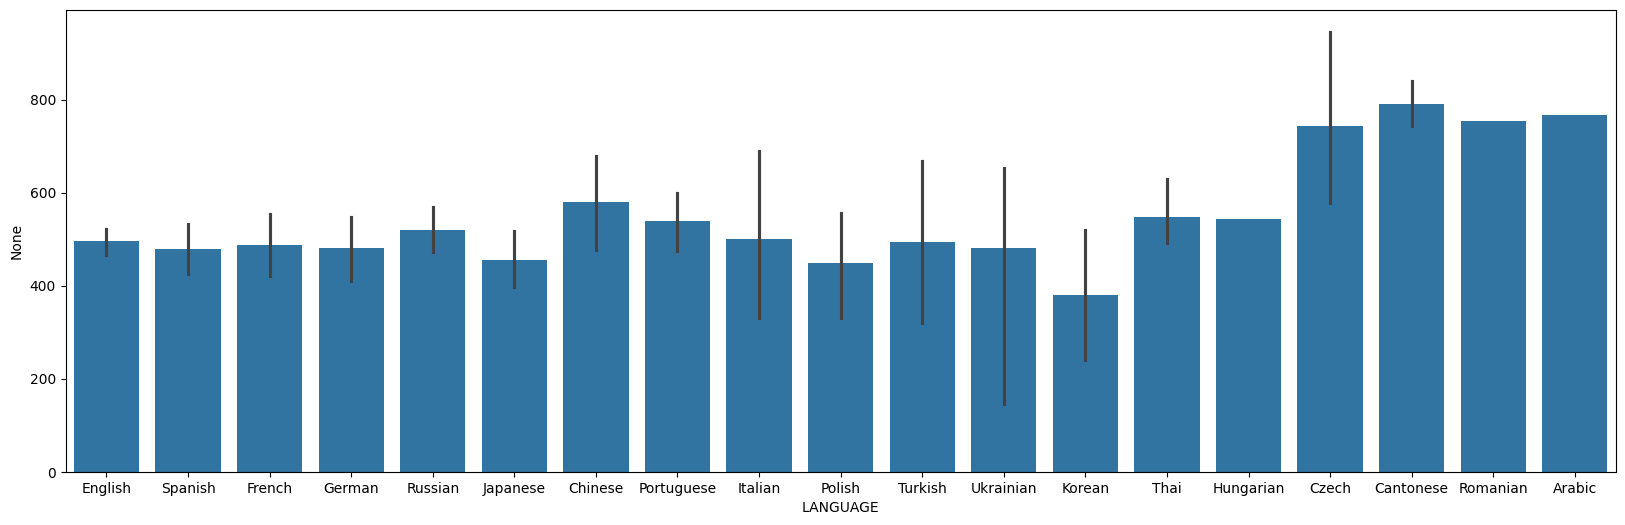

In [108]:
plt.figure(figsize=(20,6))
sns.barplot(x="LANGUAGE", y=df.LANGUAGE.index, data=df);

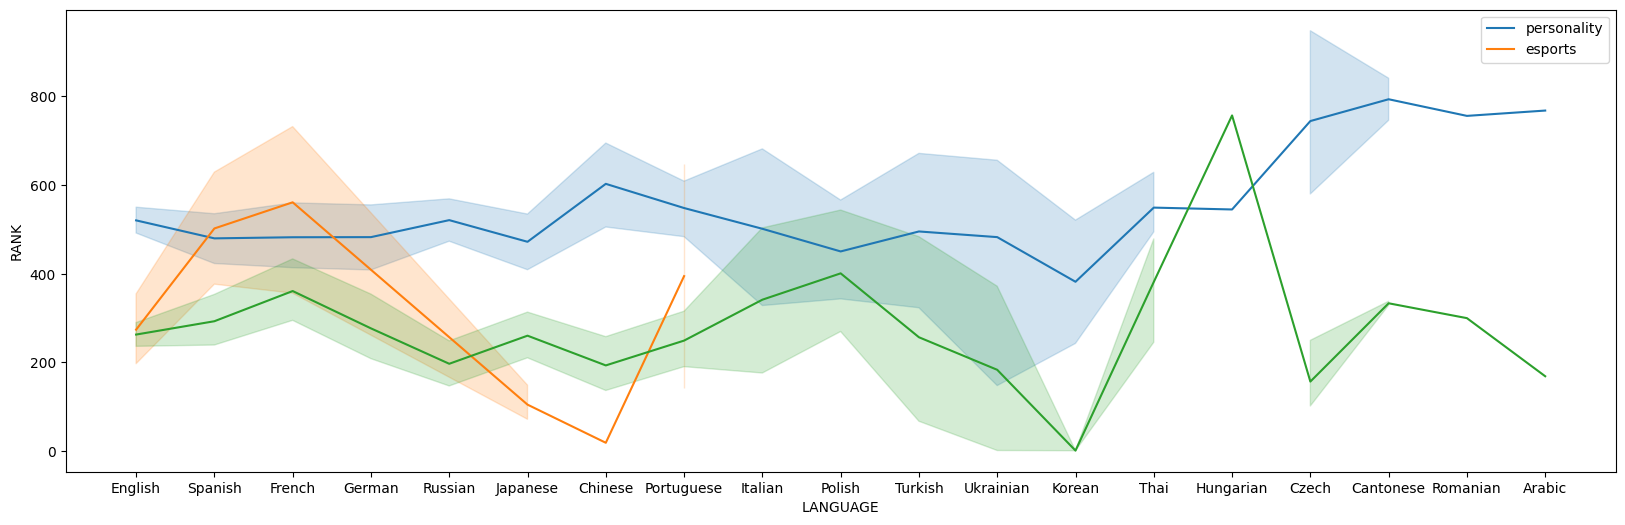

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("dataset.csv")
plt.figure(figsize=(20, 6))
sns.lineplot(x="LANGUAGE", y="RANK", data=df, hue="TYPE");
sns.lineplot(x="LANGUAGE", y="FOLLOWERS_GAINED_PER_STREAM", data=df);